In [ ]:
# 베이스 - 디지털 신호 처리
# CNN - FIR 필터(음성 분석)
# RNN, LTSM - IIR필터 (음성분석)
# 피드백 (IIR)을 준다는 개념은
# 특정값을 찾아 수렴시키는 것이라 보면 된다.
# 마이크로 펀딩 => FPGA

In [ ]:
# ∂

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
! ls Applied-Deep-Learning-with-Keras/Lesson09/

AAPL_test.csv	  Activity18.ipynb  Exercise28.ipynb
AAPL_train.csv	  Activity19.ipynb  MSFT_test.csv
Activity17.ipynb  Exercise27.ipynb  MSFT_train.csv


In [33]:
trainSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv'
)
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [34]:
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [37]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(trainSetScalead[i-60:i, 0])
    y_train.append(trainSetScalead[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [40]:
model = Sequential()

In [56]:
model = Sequential()

model.add(
    LSTM(
        100, return_sequences = True, 
        input_shape = (X_train.shape[1], 1)
    )
)
model.add(
    LSTM(100, return_sequences = True)
)
model.add(
    LSTM(100, return_sequences = True)
)
model.add(LSTM(100))
model.add(Dense(1))

In [57]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0223
Epoch 2/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0024
Epoch 3/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0017
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0017
Epoch 7/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0013
Epoch 8/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0012
Epoch 9/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0011
Epoch 10/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0011
Epoch 12/100
38/38 [==============================] - 3s 66ms/step - loss: 9.8273e-04
Epoch 13/100
38/38 [=

Epoch 97/100
38/38 [==============================] - 2s 65ms/step - loss: 2.3159e-04
Epoch 98/100
38/38 [==============================] - 2s 66ms/step - loss: 3.0606e-04
Epoch 99/100
38/38 [==============================] - 3s 67ms/step - loss: 2.7157e-04
Epoch 100/100
38/38 [==============================] - 3s 68ms/step - loss: 3.0610e-04


In [58]:
testSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson09/AAPL_test.csv'
    
)
testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [59]:
actualStock = testSet.iloc[:, 1:2].values
actualStock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [60]:
testSet['Open']

0     154.889999
1     143.979996
2     144.529999
3     148.699997
4     149.559998
5     151.289993
6     152.500000
7     152.880005
8     150.850006
9     150.270004
10    153.080002
11    154.199997
12    157.500000
13    156.410004
14    154.149994
15    154.110001
16    155.479996
17    155.789993
18    156.250000
19    163.250000
20    166.110001
Name: Open, dtype: float64

In [61]:
trainSet['Open']

0        79.382858
1        78.980003
2        76.778572
3        77.760002
4        76.972855
           ...    
1253    148.149994
1254    148.300003
1255    155.839996
1256    157.500000
1257    158.529999
Name: Open, Length: 1258, dtype: float64

In [62]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis = 0
)

In [63]:
inputs = total[len(total) - len(testSet) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 81):
    X_test.append(inputs[i - 60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(
    X_test, 
    (X_test.shape[0], X_test.shape[1], 1)
)

predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

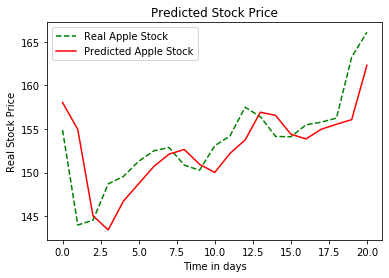

In [64]:
plt.plot(
    actualStock, color = 'green', 
    label = 'Real Apple Stock', ls='--'
)
plt.plot(
    predictedStock, color = 'red', 
    label = 'Predicted Apple Stock', ls='-'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()
# IIR 필터의 특성이 나타나고 있음
# 위상이 뒤틀린다.

In [7]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image

import numpy as np

In [8]:
def prepare_img(img, target):
    img = img.resize(target)
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = imagenet_utils.preprocess_input(img)
    
    return img

In [9]:
resModel = None

def load_model():
    global resModel
    resModel = ResNet50()

In [10]:
import keras.backend.tensorflow_backend as tb
import tensorflow as tf

global graph, model
graph = tf.get_default_graph()

print(tf.__version__)

1.14.0


In [14]:
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename

In [ ]:
app = Flask(__name__)

@app.route('/imgServer', methods = ['GET', 'POST'])
def analysis_img():
    data = {"success": False}
    if request.method == 'POST':
        print('POST')
        file = request.files['file']
        file = secure_filename(file.filename)
        print(file)
        
        sea_img = image.load_img(
            file, target_size = (2
                                 , 224)
        )
        
        trans_img = image.img_to_array(sea_img)
        trans_img = np.expand_dims(trans_img, axis = 0)
        trans_img = preprocess_input(trans_img)
        print(trans_img.shape)
        
        with graph.as_default():
            pred = resModel.predict(trans_img)
            
        label = decode_predictions(pred)
        data["predictions"] = []
        
        for (imageNetID, label, prob) in label[0]:
            r = {
                "label": label, 
                "probability": float(prob)
            }
            data["predictions"].append(r)
            
        data["success"] = True
        
    return jsonify(data)

if __name__ == "__main__":
    load_model()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


POST
test_image_2.jpg
(1, 224, 224, 3)
40960/35363 [==================================] - 0s 0us/step


127.0.0.1 - - [20/Jul/2020 15:01:43] "POST /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:02:03] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:02:27] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:02:29] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:06:06] "GET /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:06:13] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:06:46] "GET /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:06:48] "GET /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:12:01] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:12:03] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


[2020-07-20 15:17:41,957] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-18-c515d72e027e

POST
test_image_3_.jpg


127.0.0.1 - - [20/Jul/2020 15:17:46] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


[2020-07-20 15:25:40,719] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-18-c515d72e027e

POST
test_image_3_.jpg


127.0.0.1 - - [20/Jul/2020 15:26:14] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:26:18] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:27:17] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:27:21] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:29:12] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


[2020-07-20 15:29:21,984] ERROR in app: Exception on /imgServer [POST]
Traceback (most recent call last):
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/bitai/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-18-c515d72e027e

POST
test_image_3_.jpg


127.0.0.1 - - [20/Jul/2020 15:33:41] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:33:47] "POST /imgServer HTTP/1.1" 200 -


POST
man_in_suit.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:33:51] "POST /imgServer HTTP/1.1" 200 -


POST
pyramid.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:34:00] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_3.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:34:22] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_3.jpg
(1, 224, 224, 3)
